7. Using Decision Tree algorithm, predict which drug among drug A, drug B, Drug C, drug X and drug Y should be given to a patient. Find the accuracy of the decision tree in predicting the correct drug for the patient.
Dataset: drug.csv

Decision Tree Accuracy: 1.0000


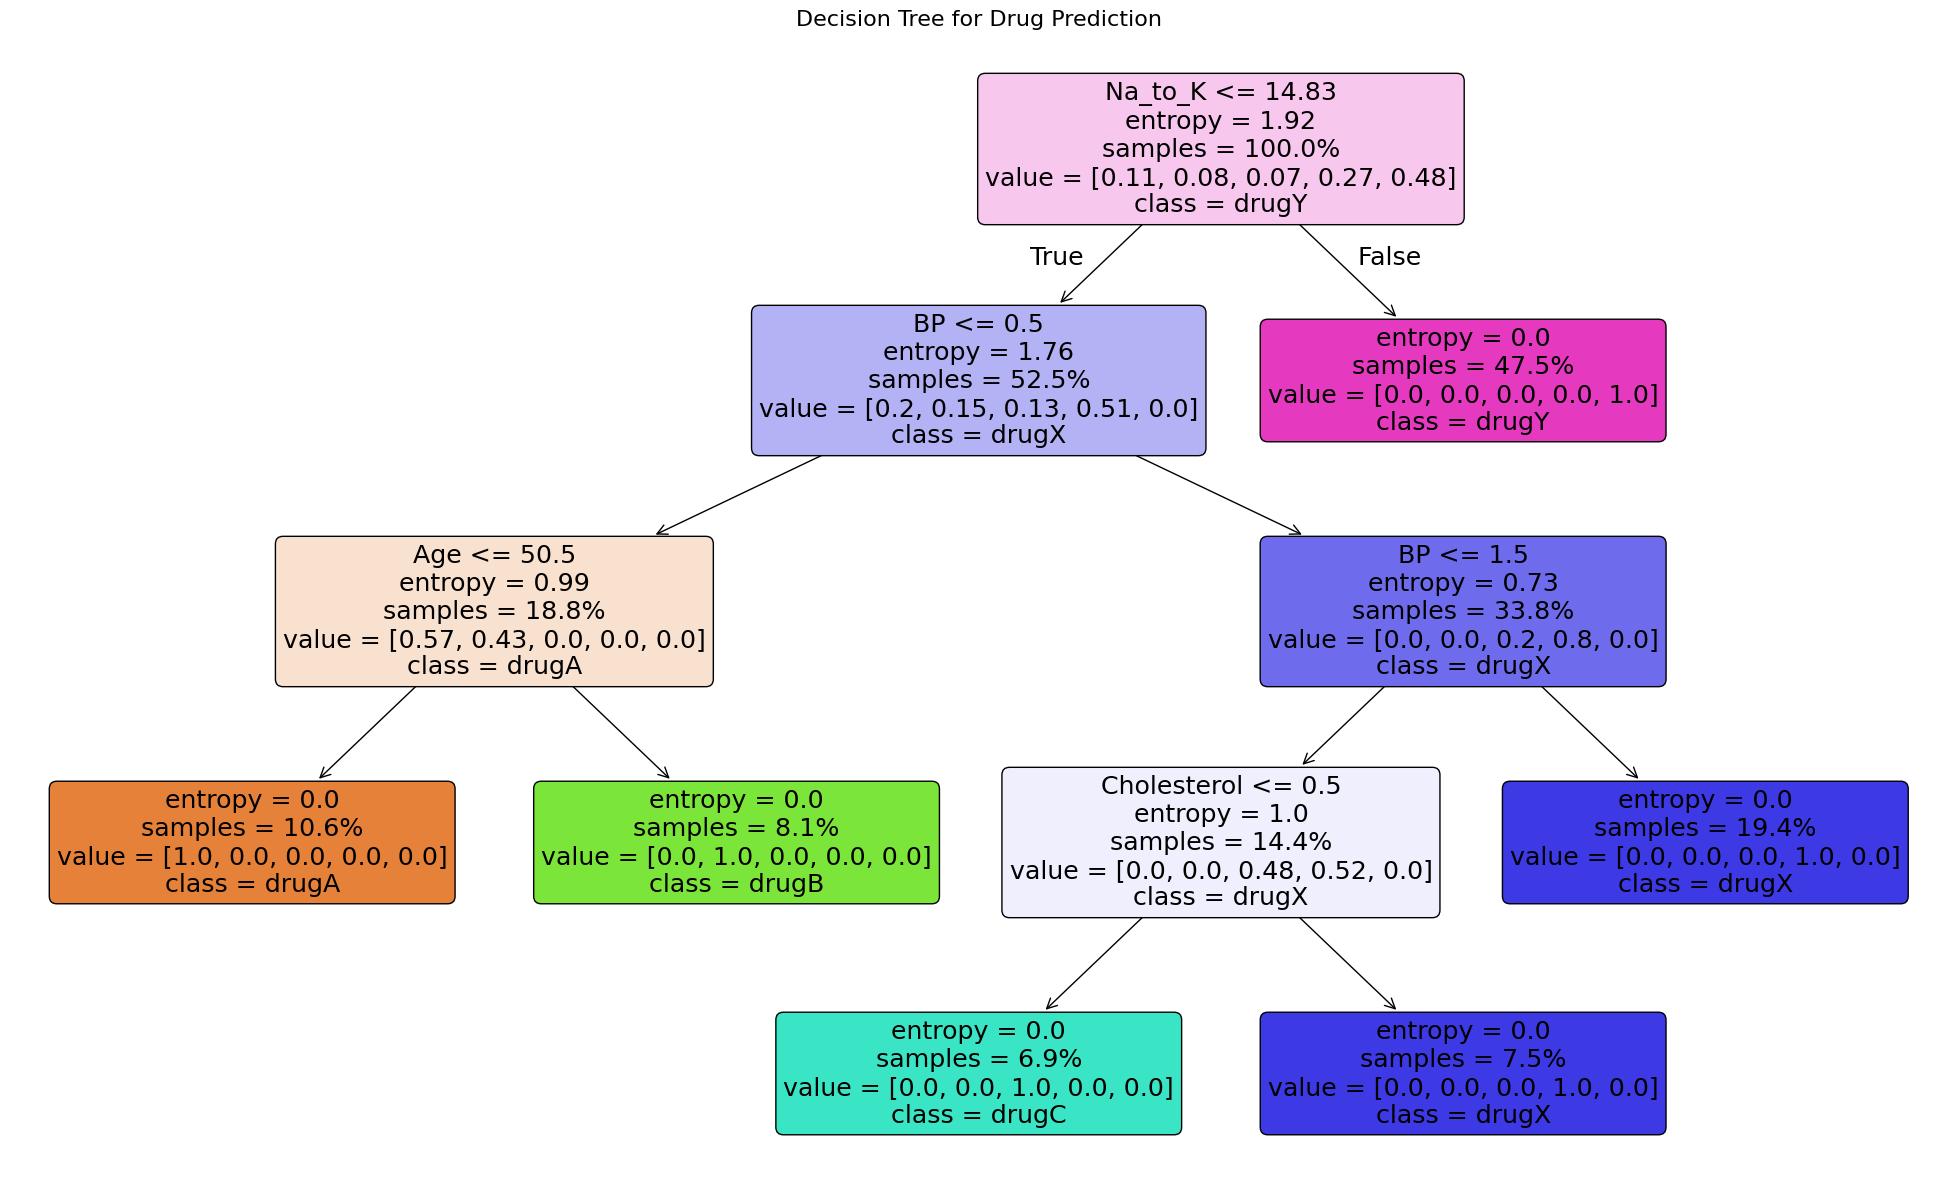

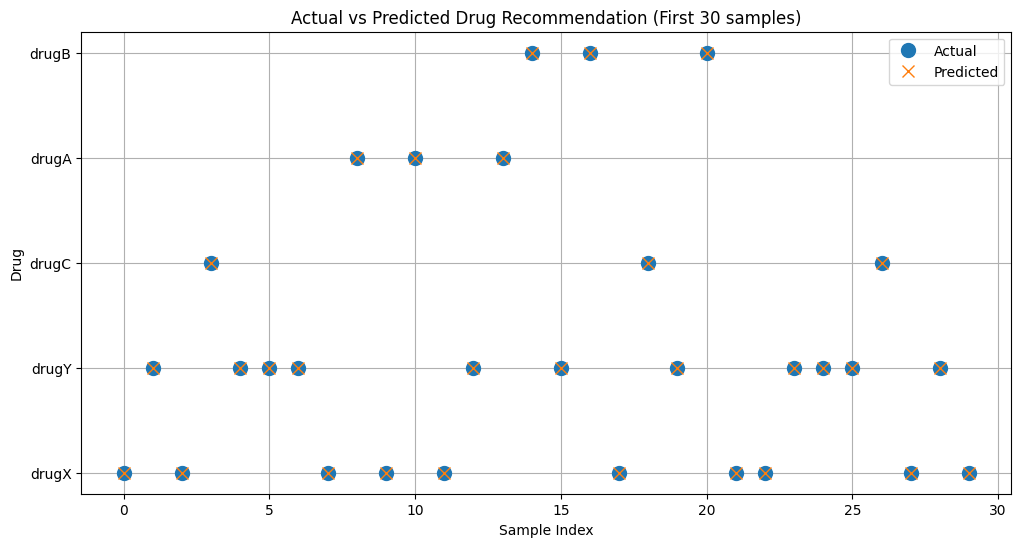

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('drug.csv')

# Convert categorical variables to numerical
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['BP'] = le.fit_transform(data['BP'])
data['Cholesterol'] = le.fit_transform(data['Cholesterol'])

x=data.iloc[:, :-1]
y=data.iloc[:, -1]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train Decision Tree
dt = DecisionTreeClassifier(criterion="entropy", splitter="best")
dt.fit(x_train, y_train)

# Predict and calculate accuracy
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the result
print(f"Decision Tree Accuracy: {accuracy:.4f}")


# 1. Decision Tree Visualization
plt.figure(figsize=(25,15))
plot_tree(dt, 
          feature_names=x.columns,
          class_names=dt.classes_,
          filled=True,
          rounded=True,
          proportion=True,
          precision=2)
plt.title("Decision Tree for Drug Prediction", fontsize=16)
plt.show()

# Visualization 4: Actual vs Predicted (sample of 30 points)
plt.figure(figsize=(12,6))
sample_size = min(30, len(y_test))  # Show up to 30 samples
plt.plot(y_test.values[:sample_size], 'o', label='Actual', markersize=10)
plt.plot(y_pred[:sample_size], 'x', label='Predicted', markersize=8)
plt.title(f'Actual vs Predicted Drug Recommendation (First {sample_size} samples)')
plt.xlabel('Sample Index')
plt.ylabel('Drug')
plt.legend()
plt.grid(True)
plt.show()

Decision Tree Accuracy: 1.0000


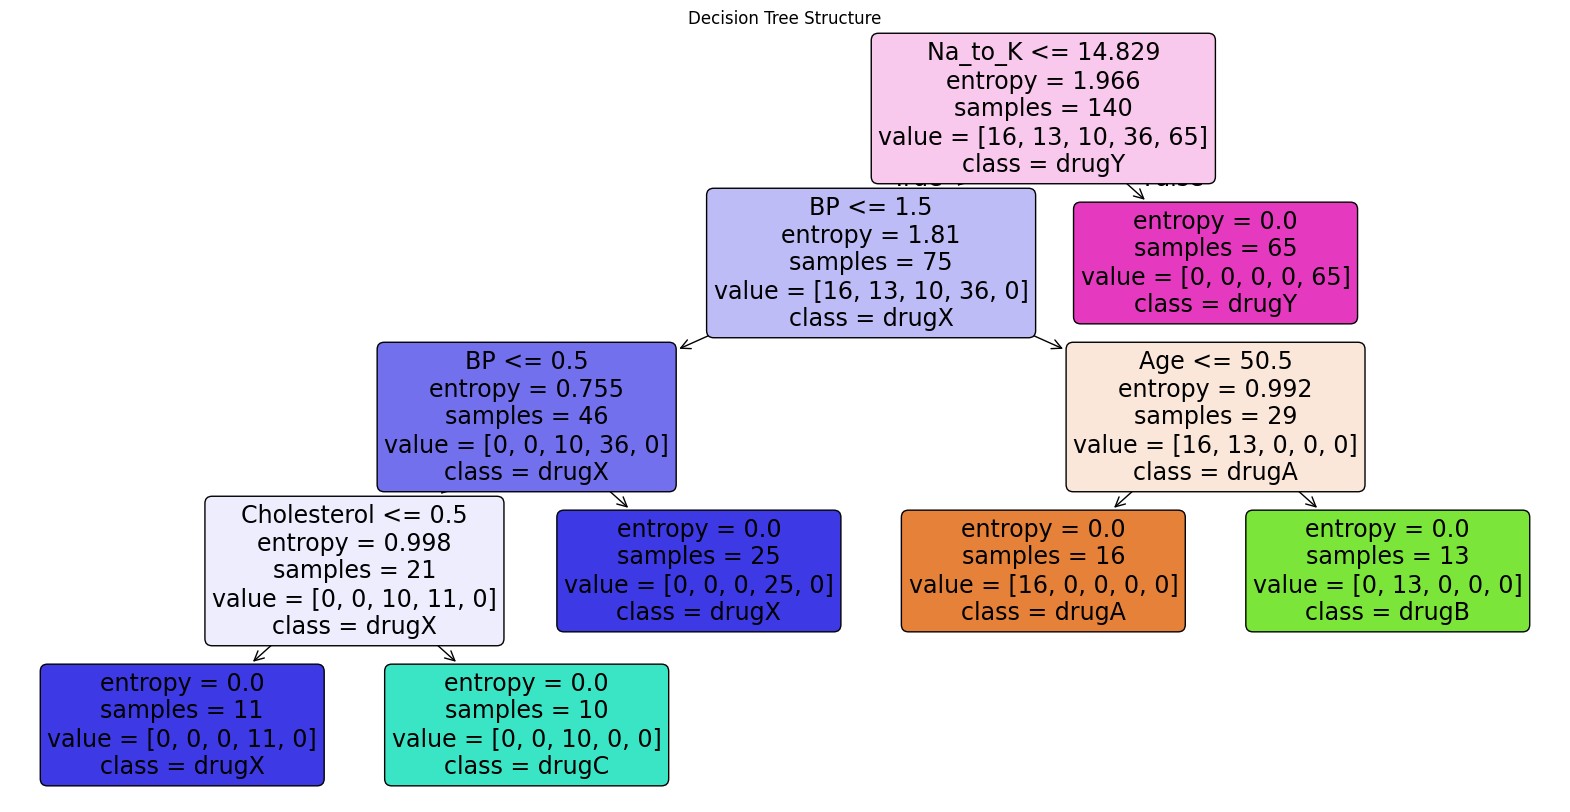

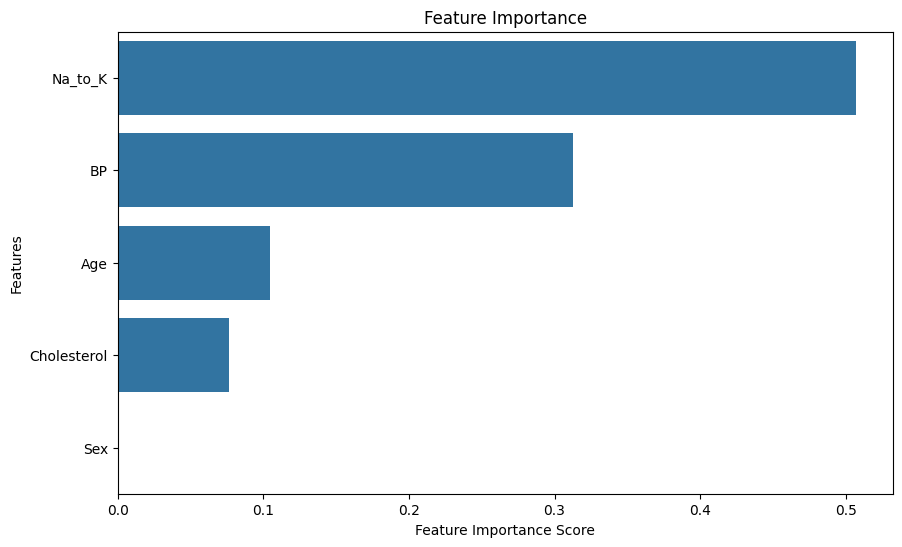

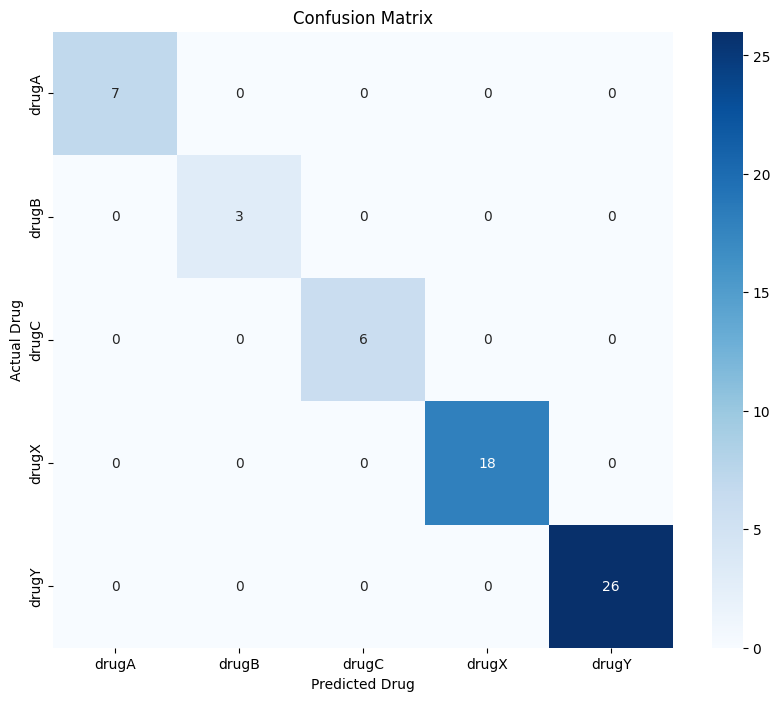

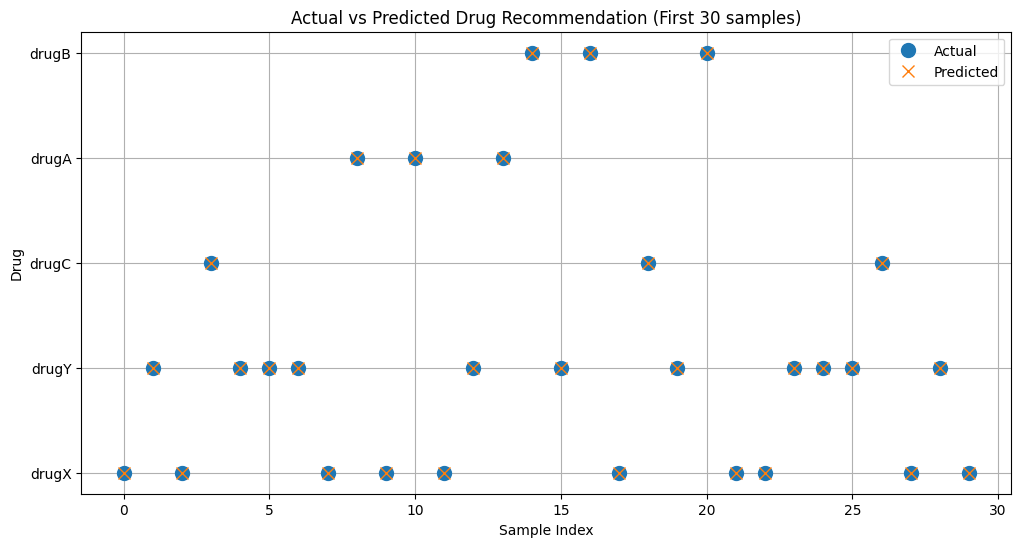

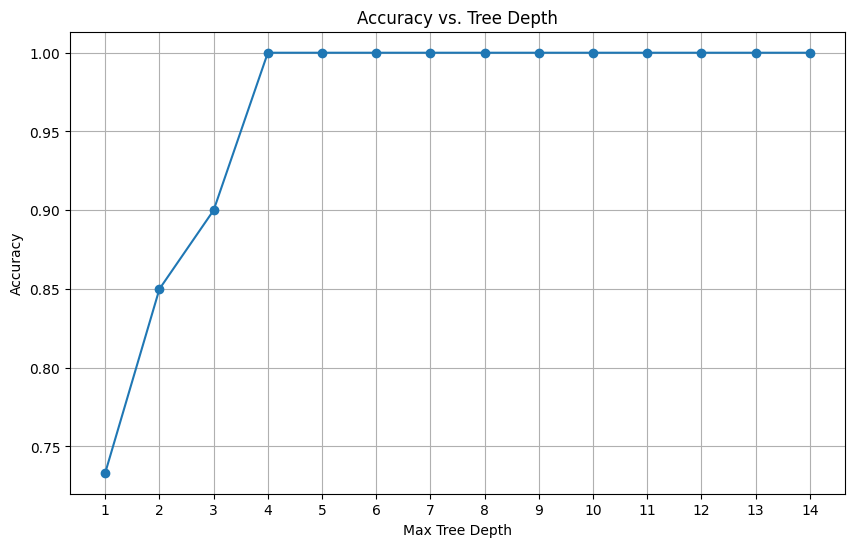

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load data
data = pd.read_csv('drug.csv')
X = data.drop('Drug', axis=1)
y = data['Drug']

# Convert categorical variables to numerical (if needed)
if 'Sex' in X.columns:
    X['Sex'] = X['Sex'].map({'F':0, 'M':1})
if 'BP' in X.columns:
    X['BP'] = X['BP'].map({'LOW':0, 'NORMAL':1, 'HIGH':2})
if 'Cholesterol' in X.columns:
    X['Cholesterol'] = X['Cholesterol'].map({'NORMAL':0, 'HIGH':1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Decision Tree model
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Visualization 1: Decision Tree Structure
plt.figure(figsize=(20,10))
plot_tree(dt, 
          feature_names=X.columns,
          class_names=dt.classes_,
          filled=True,
          rounded=True)
plt.title("Decision Tree Structure")
plt.show()

# Visualization 2: Feature Importance
feature_imp = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()

# Visualization 3: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Drug')
plt.ylabel('Actual Drug')
plt.show()

# Visualization 4: Actual vs Predicted (sample of 30 points)
plt.figure(figsize=(12,6))
sample_size = min(30, len(y_test))  # Show up to 30 samples
plt.plot(y_test.values[:sample_size], 'o', label='Actual', markersize=10)
plt.plot(y_pred[:sample_size], 'x', label='Predicted', markersize=8)
plt.title(f'Actual vs Predicted Drug Recommendation (First {sample_size} samples)')
plt.xlabel('Sample Index')
plt.ylabel('Drug')
plt.legend()
plt.grid(True)
plt.show()

# To find the optimal tree depth (prevent overfitting)
max_depths = range(1, 15)
accuracies = []

for depth in max_depths:
    dt_temp = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    y_pred_temp = dt_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

plt.figure(figsize=(10,6))
plt.plot(max_depths, accuracies, marker='o')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

Dataset Columns: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

First 5 rows:
    Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy: 1.0


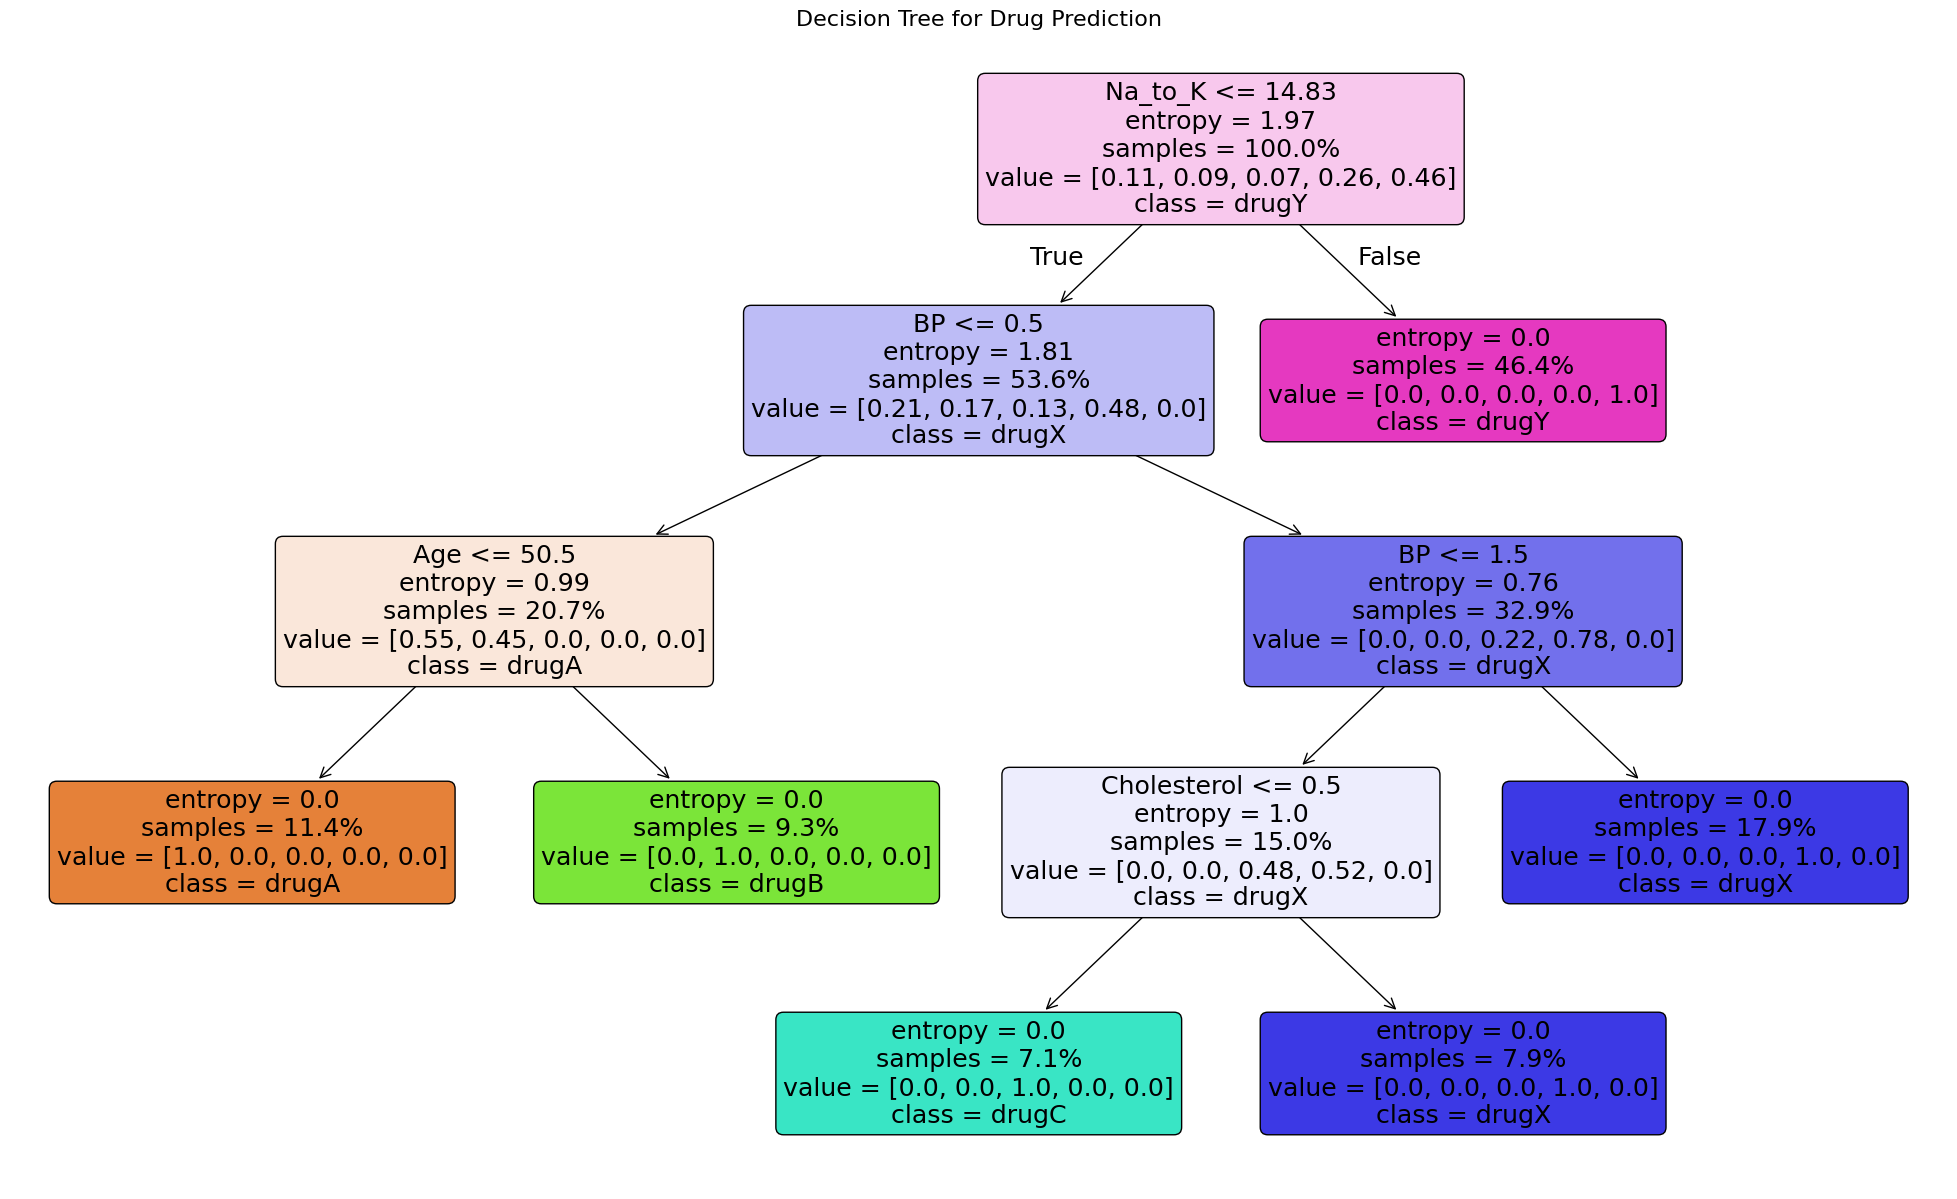

C:\Users\Hp\AppData\Local\Temp\ipykernel_16340\850347590.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


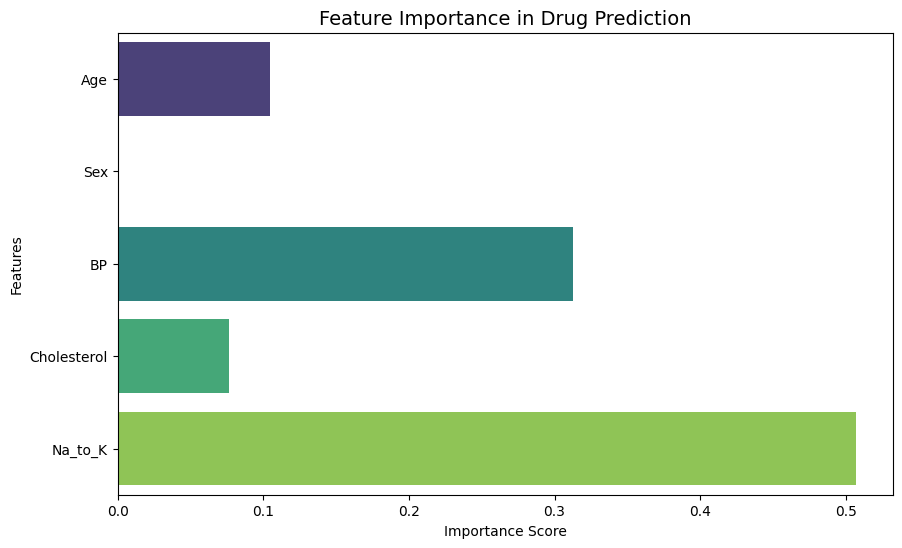

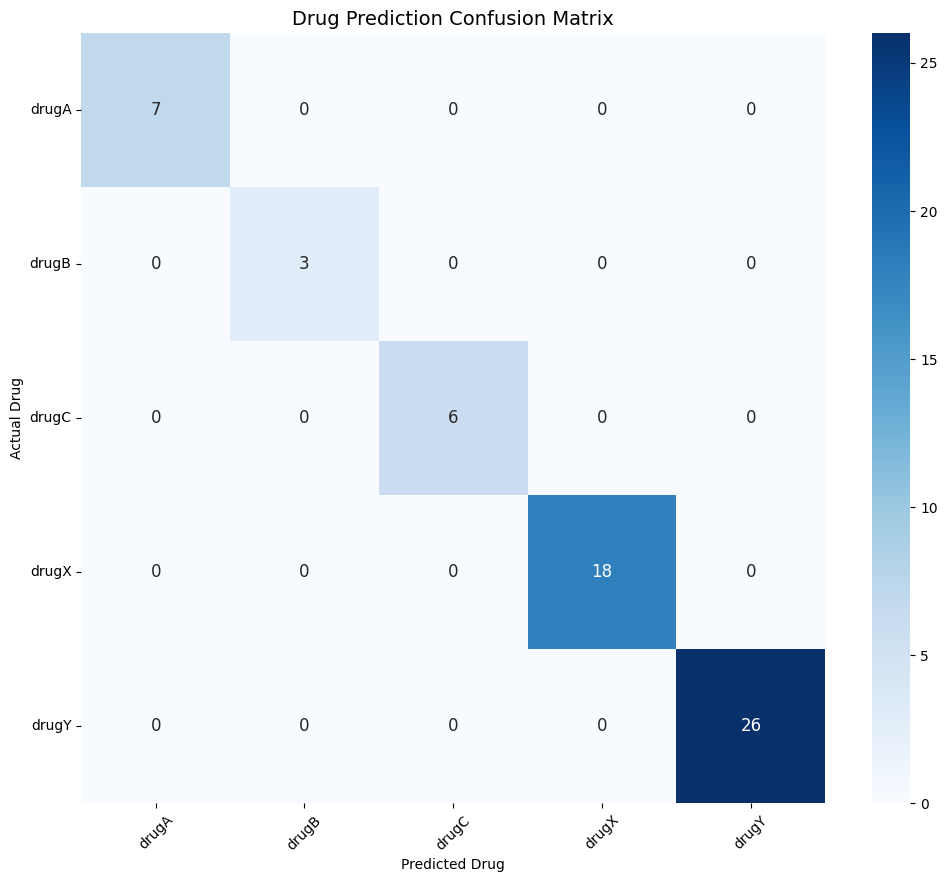

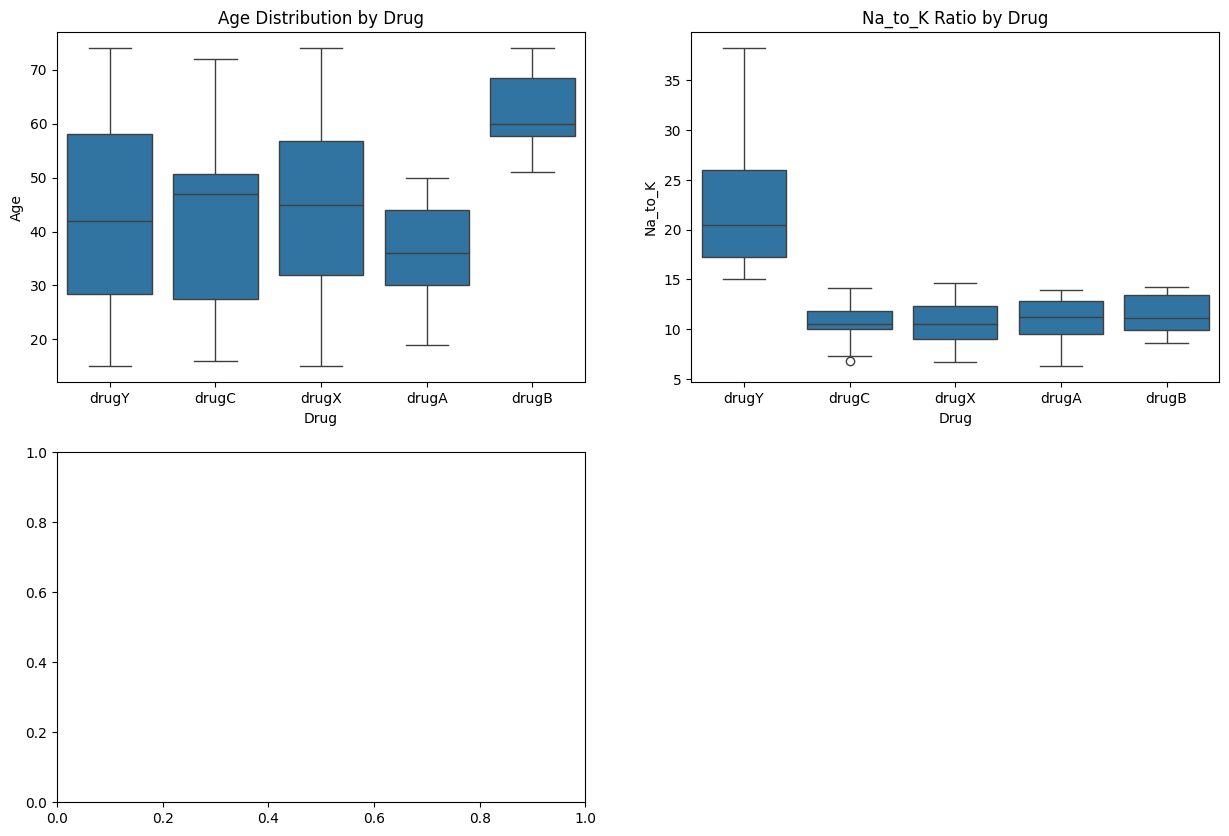

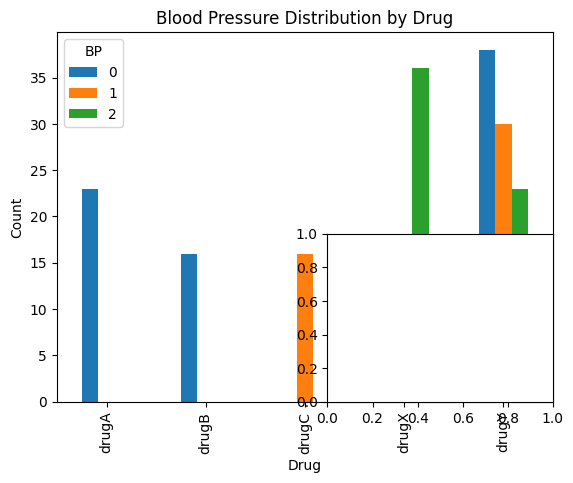

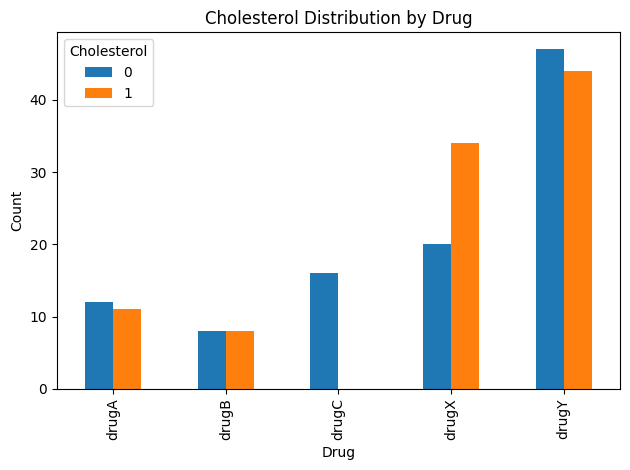

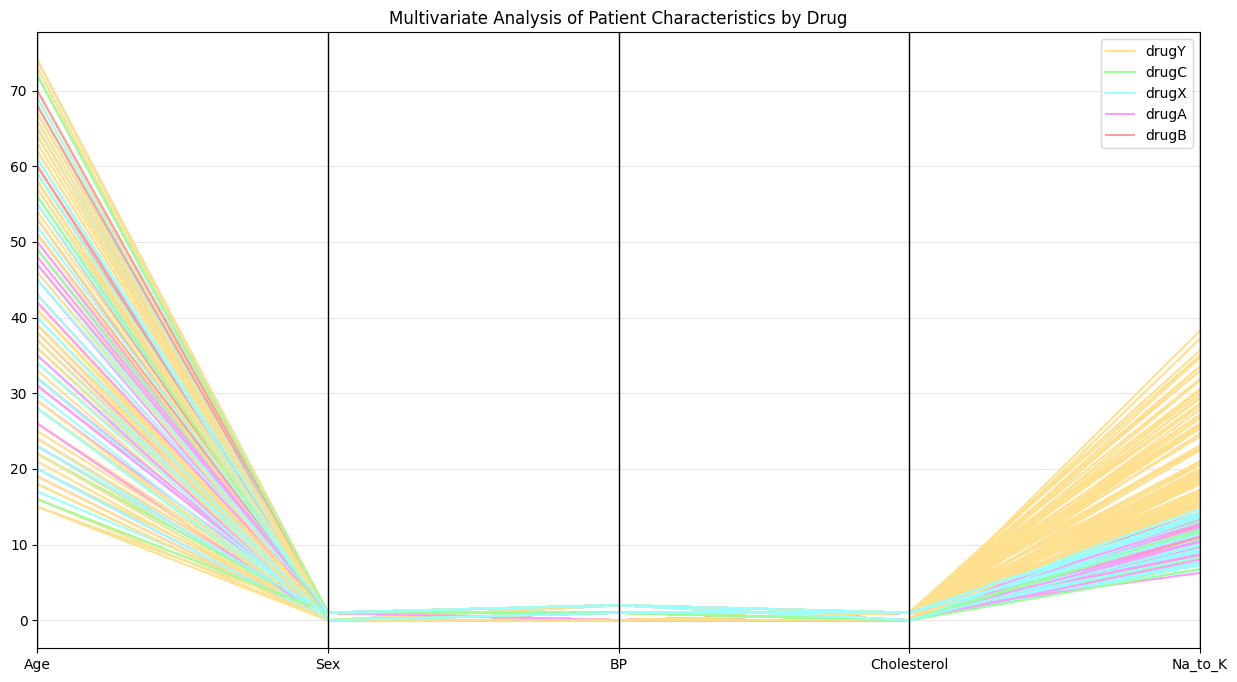

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                            classification_report)
from sklearn.preprocessing import LabelEncoder

# Load and prepare data
data = pd.read_csv('drug.csv')
print("Dataset Columns:", data.columns.tolist())
print("\nFirst 5 rows:\n", data.head())

# Convert categorical features
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['BP'] = le.fit_transform(data['BP'])
data['Cholesterol'] = le.fit_transform(data['Cholesterol'])

# Feature-target split
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Model
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Evaluation
y_pred = dt.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# 1. Decision Tree Visualization
plt.figure(figsize=(25,15))
plot_tree(dt, 
          feature_names=X.columns,
          class_names=dt.classes_,
          filled=True,
          rounded=True,
          proportion=True,
          precision=2)
plt.title("Decision Tree for Drug Prediction", fontsize=16)
plt.show()

# 2. Feature Importance
features = X.columns
importances = dt.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance in Drug Prediction", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 3. Enhanced Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt.classes_,
            yticklabels=dt.classes_,
            annot_kws={"size": 12})
plt.title("Drug Prediction Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Drug")
plt.ylabel("Actual Drug")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# 4. Patient Characteristics Analysis
plt.figure(figsize=(15,10))

# Age Distribution by Drug
plt.subplot(2,2,1)
sns.boxplot(x='Drug', y='Age', data=data)
plt.title("Age Distribution by Drug")

# Na_to_K Ratio by Drug
plt.subplot(2,2,2)
sns.boxplot(x='Drug', y='Na_to_K', data=data)
plt.title("Na_to_K Ratio by Drug")

# BP Distribution by Drug
plt.subplot(2,2,3)
pd.crosstab(data['Drug'], data['BP']).plot(kind='bar')
plt.title("Blood Pressure Distribution by Drug")
plt.ylabel("Count")

# Cholesterol Distribution by Drug
plt.subplot(2,2,4)
pd.crosstab(data['Drug'], data['Cholesterol']).plot(kind='bar')
plt.title("Cholesterol Distribution by Drug")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# 5. Parallel Coordinates Plot (for multivariate analysis)
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,8))
parallel_coordinates(data, 'Drug', color=('#FFE08E', '#9CFF9C', '#9CFFFF', '#FF9CFF', '#FF9C9C'))
plt.title("Multivariate Analysis of Patient Characteristics by Drug")
plt.grid(alpha=0.3)
plt.show()